# Visualizing Earnings Based On College Majors
## Purpose:
We will be exploring a dataset on the job outcomes of students who graduated from college between 2010 and 2012. We will focus on the visualization of the data.
## Data Source:
The data was originally released by American Community Survey.
## Data Format:
Each row in the dataset represents a different major in college. The colums in the dataset are as follows:
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')

## Initial Description

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [7]:
recent_grads.describe(include = 'all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,TREATMENT THERAPY PROFESSIONS,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [8]:
recent_grads.shape

(173, 21)

The dataset have 173 rows and 21 columns. 'Major' and 'Major_category' columns contain string values while other columns contain numerical values.

## Null Value Dropout

Some columns only have 172 values instead of 173 values. Therefore there exist null values. We nee to drop out the rows containing null values.

In [9]:
raw_data_count = recent_grads.shape[0]

In [10]:
recent_grads.dropna(inplace = True)
cleaned_data_count = recent_grads.shape[0]

In [11]:
print(raw_data_count,cleaned_data_count)

173 172


We noticed that only one row was dropped.

## Scatter Plots

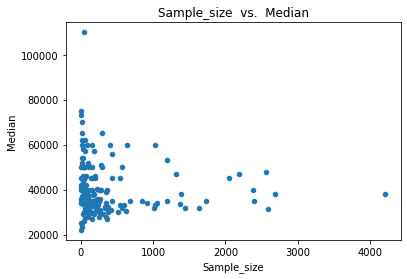

In [15]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter', title = 'Sample_size  vs.  Median')

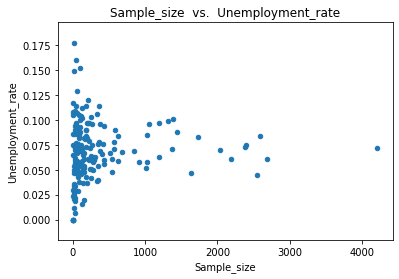

In [16]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter', title = 'Sample_size  vs.  Unemployment_rate')

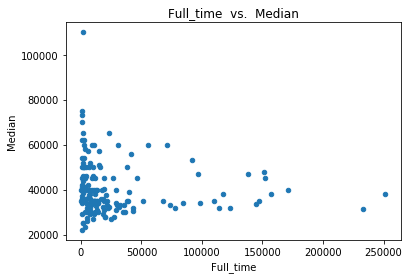

In [18]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter', title = 'Full_time  vs.  Median')

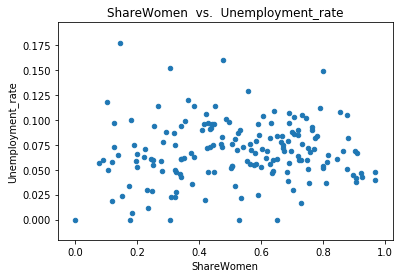

In [19]:
recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter', title = 'ShareWomen  vs.  Unemployment_rate')

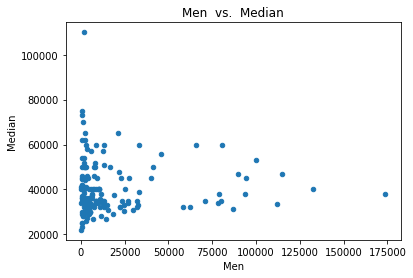

In [21]:
recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter', title = 'Men  vs.  Median')

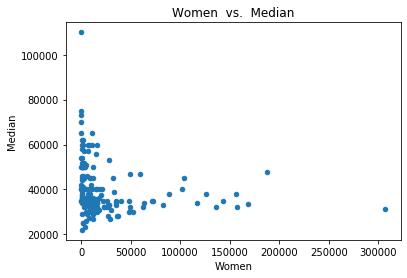

In [22]:
recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter', title = 'Women  vs.  Median')

It seemed there is NO evidence to support:
* Students in more popular majors make more money.
* Students that majored in subjects that were majority female make more money.
* There is any link between the number of full-time employees and median salary.

## Histogram

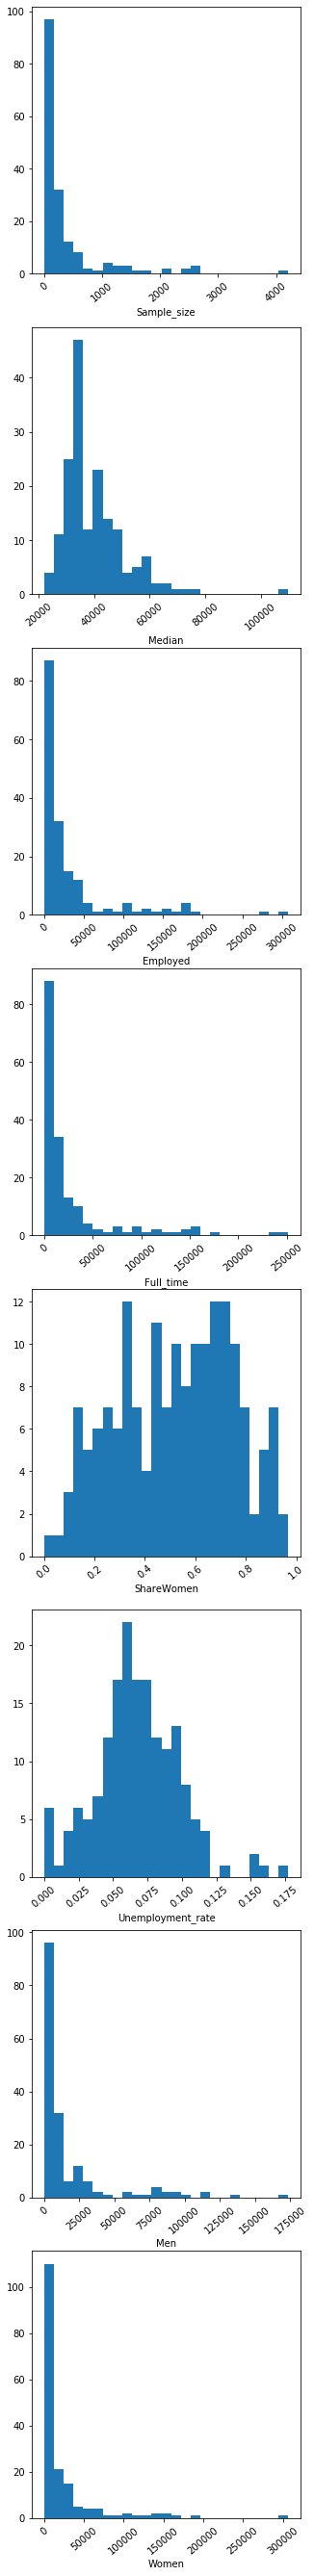

In [44]:
col = ['Sample_size','Median','Employed','Full_time','ShareWomen','Unemployment_rate','Men','Women']
fig = plt.figure(figsize = (5,48))
for i in range(8):
    ax = fig.add_subplot(8,1,i + 1)
    ax.hist(recent_grads[col[i]], bins = 25)
    ax.tick_params(axis = 'x', rotation = 40)
    ax.set_xlabel(col[i])

## Scatter Matrix Plot

In [45]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024680B39248>,
      dtype=object)

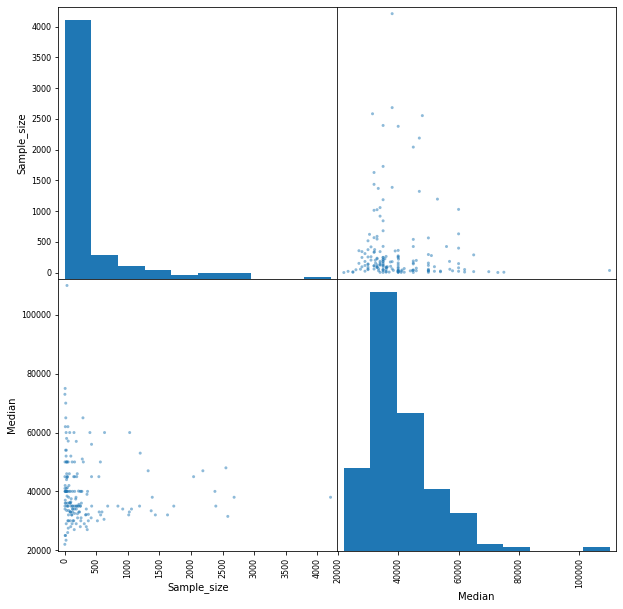

In [46]:
scatter_matrix(recent_grads[['Sample_size','Median']],figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002468008FE48>,
      dtype=object)

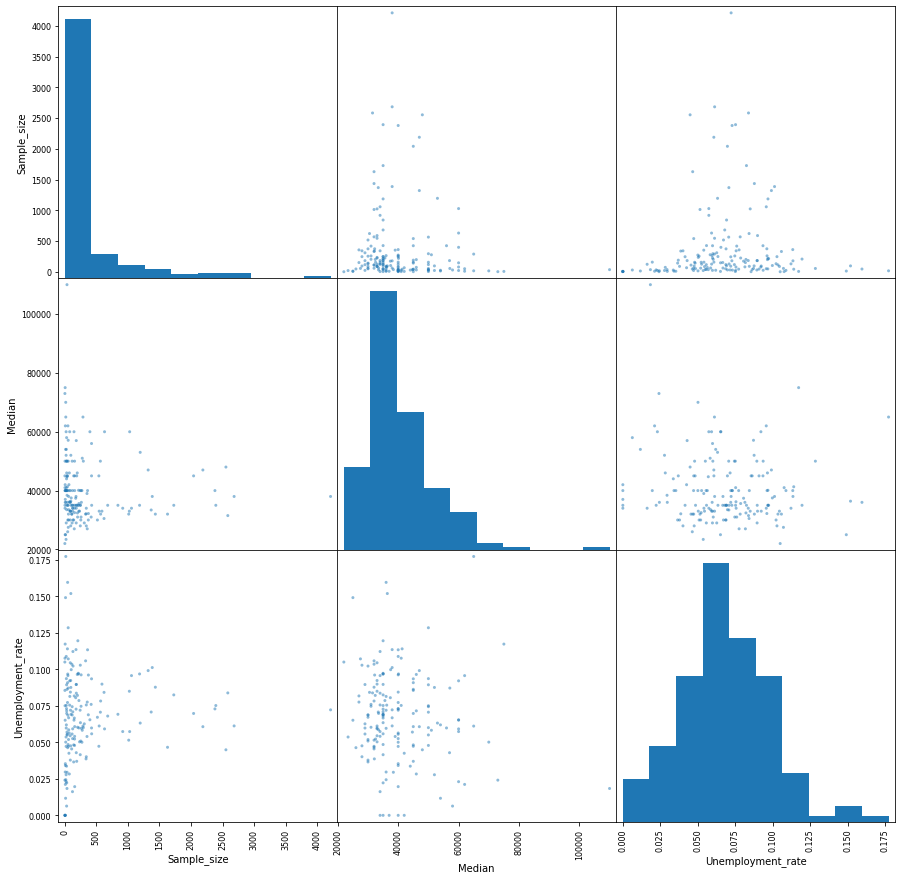

In [49]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize = (15,15))

## Bar Plots

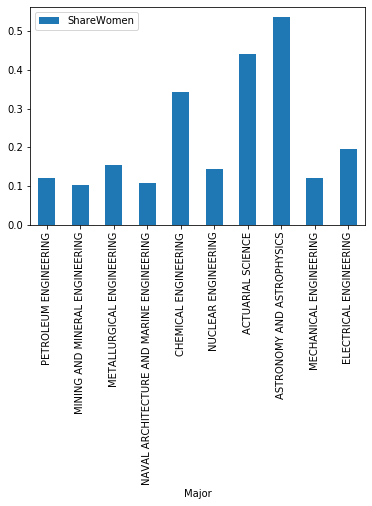

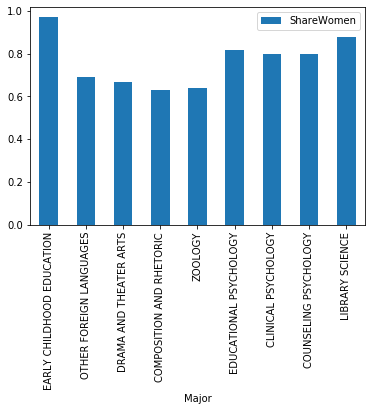

In [55]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[163:].plot.bar(x='Major', y='ShareWomen')

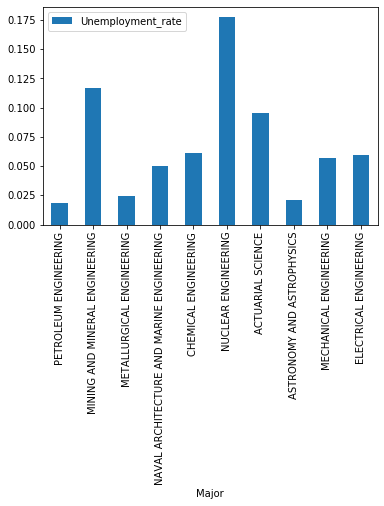

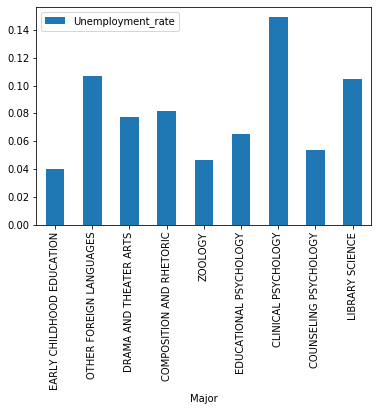

In [56]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate')